In [1]:
# IMPORT OUR DEPENDENCIES:  

#To create our randomly-selected coordinates:
import random
import requests
import numpy as np


#To hold our data and create dataframes:
import pandas as pd


#Our API keys, and citipy (newly installed for project), to import the city weather-data.
from config import api_key
from citipy import citipy 


#And to plot our data:
import matplotlib.pyplot as plt
import matplotlib


#Last, for any formating of plots (they may be needed):
import seaborn



In [2]:
# GETTING A RANDOM SET OF COORDINATES TO USE FOR CALLING ON CITY WEATHER: 

# First we define the Latitude & Longitude Zones use numpy to select coordinates at random, given the ranges:
lat_zone = np.arange(-90,90,15)
lon_zone = np.arange(-200,200,15)


In [3]:
# DATAFRAME TO HOLD OUR COORDINATES:

# Create our list/Pandas DataFrame & calling it "cities" which will hold the coordinates to their city.


cities_df = pd.DataFrame()

cities_df["Latitude"] = ""
cities_df["Longitude"] = ""



In [4]:
# COORDINATE SELECTION!

# First, using a coordinate systen we will assign "X" for latitude, and "Y" for long.
# For both latitude "X" & longitude "Y", we randomly select **(50 ?) unique coordinates:
# **For the random sample we collect, we will assign "lats" for X and "lons" for y.
# We then will create/append the lists, "lat_samples" and "lon_samples", to use in dataframes.

for x in lat_zone:
    for y in lon_zone:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lats = random.sample(x_values,50)
        lons = random.sample(y_values,50)
        lat_samples = [(x+dec_lat) for dec_lat in lats]
        lon_samples = [y+dec_lon for dec_lon in lons]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":lat_samples,
                                       "Longitude":lon_samples}))

# We then place the coordinates into our "cities" dataframe that was created above.        
cities_df = cities_df.reset_index(drop=True)

# IS THIS LINE NECC ??
cities_df.shape

(16200, 2)

In [5]:
# USING CITIPY MODULE TO TIE COORDINATES TO A CORRESPONDING/NEARBY CITY:

cities_df["Closest City name"] = ""
cities_df["Closest Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"Closest City name",city.city_name)
    cities_df.set_value(index,"Closest Country code",city.country_code)

C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  import sys
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [6]:
# CLEANING THE DATAFRAME: ELIMINATE COORDINATE-SETS THAT DON'T YIELD NEARBY CITIES:


# First we create a new data frame that eliminates coordinates that aren't near any city:
# ..Calling it "clean_cities":
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df

# Next we filter for any possible duplicates (cities that come twice)
clean_cities_df = clean_cities_df.drop_duplicates()

# **Neccesary?
clean_cities_df.shape

(862, 2)

In [7]:
# CREATING OUR SET OF CITIES WE WILL MAKE AN API CALL WITH

# Creation of our random sample set of cities from our "clean" data frame (above).
# Now we use a sample size of 500 in order to return their weather data.
# ** We will call this group of 500, "selected_cities".

selected_cities = clean_cities_df.sample(500)

selected_cities = selected_cities.reset_index(drop=True)



In [10]:
# USING API CALLS TO GATHER WEATHER INFO ON OUR SELECTED CITIES:

# We use Openweathermap to make our API CALLS:
# Set up format for the calls:
base_url = "http://api.openweathermap.org/data/2.5/weather"

app_id = api_key

params = { "appid" :app_id,"units":"metric" }




In [11]:
# NOW enter the call data, url formatting, variables we want to collect &
# interate through for our "selected_cities" group:

def encrypt_key(input_url):
    return input_url[0:53]+"<YourKey>"+input_url[85:]

for index,row in selected_cities.iterrows():
    params["q"] =f'{row["Closest City name"]},{row["Closest Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))

Retrieving weather information for grand baie,mu
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=grand+baie%2Cmu
Retrieving weather information for tarakan,id
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tarakan%2Cid
Retrieving weather information for rincon,an


C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:13: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  del sys.path[0]
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  from ipykernel import kernelapp as app
C:\Users\Adam Knapp\AppData\Local\conda\conda\envs\PythonData\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  app.launch_n

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rincon%2Can
Retrieving weather information for yirol,sd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=yirol%2Csd
Retrieving weather information for ardakan,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ardakan%2Cir
Retrieving weather information for kutum,sd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kutum%2Csd
Retrieving weather information for elko,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=elko%2Cus
Retrieving weather information for orjahovo,bg
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=orjahovo%2Cbg
Retrieving weather information for itaqui,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=itaqui%2Cbr
Retrieving weather information for fort dodge,us
http://api.openweathermap.org/data/2.5/weather?appid=

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=beitbridge%2Czw
Retrieving weather information for lepaterique,hn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lepaterique%2Chn
Retrieving weather information for grand-lahou,ci
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=grand-lahou%2Cci
Retrieving weather information for azimur,ma
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=azimur%2Cma
Retrieving weather information for clyde river,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=clyde+river%2Cca
Retrieving weather information for puerto quijarro,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+quijarro%2Cbo
Retrieving weather information for birjand,ir
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=birjand%2Cir
Retrieving weather information for raudeberg,n

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=palaiokhora%2Cgr
Retrieving weather information for deputatskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=deputatskiy%2Cru
Retrieving weather information for harper,lr
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=harper%2Clr
Retrieving weather information for witbank,za
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=witbank%2Cza
Retrieving weather information for lavumisa,sz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=lavumisa%2Csz
Retrieving weather information for asosa,et
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=asosa%2Cet
Retrieving weather information for basoko,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=basoko%2Ccd
Retrieving weather information for gayny,ru
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=jimo%2Ccn
Retrieving weather information for pochutla,mx
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=pochutla%2Cmx
Retrieving weather information for puerto pinasco,py
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+pinasco%2Cpy
Retrieving weather information for hihifo,to
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=hihifo%2Cto
Retrieving weather information for broome,au
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=broome%2Cau
Retrieving weather information for matara,lk
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=matara%2Clk
Retrieving weather information for rovaniemi,fi
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rovaniemi%2Cfi
Retrieving weather information for iqaluit,ca
http://api.openweathermap.org/

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kautokeino%2Cno
Retrieving weather information for puerto carreno,co
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=puerto+carreno%2Cco
Retrieving weather information for mapiri,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=mapiri%2Cbo
Retrieving weather information for barrow,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=barrow%2Cus
Retrieving weather information for sorvag,fo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sorvag%2Cfo
Retrieving weather information for la asuncion,ve
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=la+asuncion%2Cve
Retrieving weather information for palafrugell,es
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=palafrugell%2Ces
Retrieving weather information for festus,us
http://api.open

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=juxian%2Ccn
Retrieving weather information for katakwi,ug
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=katakwi%2Cug
Retrieving weather information for nemuro,jp
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=nemuro%2Cjp
Retrieving weather information for wamba,cd
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=wamba%2Ccd
Retrieving weather information for rikitea,pf
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=rikitea%2Cpf
Retrieving weather information for praia da vitoria,pt
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=praia+da+vitoria%2Cpt
Retrieving weather information for cidreira,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=cidreira%2Cbr
Retrieving weather information for nurota,uz
http://api.openweathermap.org

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tazmalt%2Cdz
Retrieving weather information for gweru,zw
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=gweru%2Czw
Retrieving weather information for kadykchan,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kadykchan%2Cru
Retrieving weather information for wahran,dz
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=wahran%2Cdz
Retrieving weather information for apple valley,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=apple+valley%2Cus
Retrieving weather information for tabiauea,ki
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=tabiauea%2Cki
Retrieving weather information for hay river,ca
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=hay+river%2Cca
Retrieving weather information for palabuhanratu,id
http://api.openweathe

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=bargal%2Cso
Retrieving weather information for coos bay,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=coos+bay%2Cus
Retrieving weather information for sentyabrskiy,ru
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sentyabrskiy%2Cru
Retrieving weather information for linhares,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=linhares%2Cbr
Retrieving weather information for palmer,us
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=palmer%2Cus
Retrieving weather information for chuy,uy
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=chuy%2Cuy
Retrieving weather information for victoria,sc
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=victoria%2Csc
Retrieving weather information for tonj,sd
http://api.openweathermap.org/data/2.

http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=izhma%2Cru
Retrieving weather information for odiongan,ph
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=odiongan%2Cph
Retrieving weather information for ponta pora,br
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=ponta+pora%2Cbr
Retrieving weather information for villamontes,bo
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=villamontes%2Cbo
Retrieving weather information for xifeng,cn
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=xifeng%2Ccn
Retrieving weather information for kishi,ng
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=kishi%2Cng
Retrieving weather information for sitangkai,ph
http://api.openweathermap.org/data/2.5/weather?appid=<YourKey>&units=metric&q=sitangkai%2Cph
Retrieving weather information for traverse city,us
http://api.openweatherm

In [12]:
# POST CALL-RETREIVING:  CLEAN UP DATA (When needed) AND EXPORT OUR DATA TO CSV:
selected_cities = selected_cities.dropna()

selected_cities.shape
selected_cities.to_csv("City_Weather_data.csv")

In [13]:
#  PLOTTING:  FIRST WE SET OUR TIME PROPERTIES FOR OUR SCATTER-PLOTS:
# import datetime
# date = datetime.date.today()
import time
date = time.strftime("%m/%d/%Y")
# print(date)




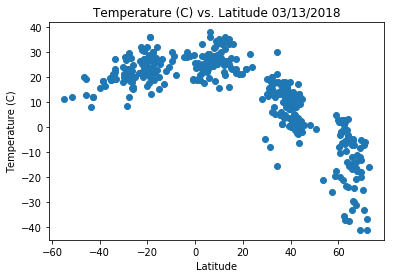

In [19]:
#  TEMPERATRUE VS LATITUDE

plt.scatter(selected_cities['Latitude'],selected_cities['Temperature'])
plt.title(f"Temperature (C) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.style.use('ggplot')
plt.savefig("Temperature.png")
plt.show()

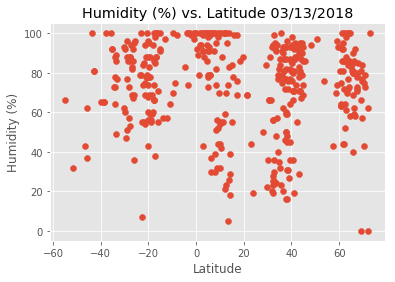

In [20]:
#  HUMIDITY VS LATITUDE

# plt.scatter(latitude,humidity)
plt.scatter(selected_cities['Latitude'], selected_cities['Humidity'])
plt.title(f"Humidity (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.style.use('ggplot')
plt.savefig("Humidity.png")
plt.show()

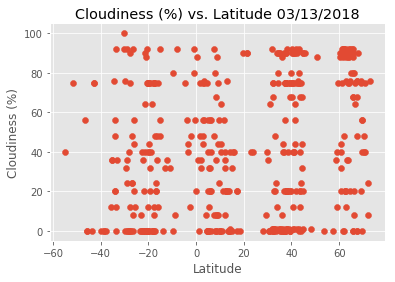

In [21]:
#  "CLOUDINESS" VS LATITUDE

# plt.scatter(latitude,cloudy)
plt.scatter(selected_cities['Latitude'], selected_cities['Cloudiness'])
plt.title(f"Cloudiness (%) vs. Latitude {date}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.style.use('ggplot')
plt.savefig("Cloudiness.png")
plt.show()
